## 画像の主観的価値の確認

In [ ]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from src.const import DATA_PATH, ROOT_PATH
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [2]:
resp = pd.read_csv(os.path.join(ROOT_PATH, "data/data_responses_NCNP_2types.csv"))
# BMI 25以上を肥満とする
resp["is_obesity"] = resp["BMI"] >= 25
print("肥満率", resp["is_obesity"].mean())

outlier = resp["sub_ID"].unique()[
    (resp.groupby("sub_ID")["res_L"].value_counts().unstack() > 896 * 0.75).any(
        axis=1
    )
    | (
        (resp.groupby("sub_ID")["res_L"].unique().apply(lambda x: len(x)) <= 4)
        & (
            resp.groupby("sub_ID")["res_L"].value_counts().unstack() > 896 * 0.65
        ).any(axis=1)
    )
]
print("被験者", outlier, len(outlier), "人を除外")
print(
    "75%以上の試行で同じ選択をしている被験者もしくは4種類以下の選択肢しか選択していないかつ65%で同じ選択の被験者を除外"
)
res_mean = (
    resp[~resp["sub_ID"].isin(outlier)]
    .groupby(["img"])[["res_L", "res_H", "res_T"]]
    .mean()
    .copy()
)
res_mean

肥満率 0.4472361809045226
被験者 [ 50  83 104 121 130 137 138 143 147 150] 10 人を除外
75%以上の試行で同じ選択をしている被験者もしくは4種類以下の選択肢しか選択していないかつ65%で同じ選択の被験者を除外


,res_L,res_H,res_T
img,,,
1,5.867725,2.656085,6.433862
2,6.285714,3.031746,6.899471
3,6.227513,2.402116,6.973545
4,5.169312,2.502646,5.687831
5,4.608466,2.269841,4.989418
6,5.269841,2.444444,5.777778
7,5.788360,3.671958,6.269841
8,4.227513,2.915344,4.740741
9,4.984127,2.380952,5.507937


/Users/yuhiaoki/dev/hit/self_study/foodReward/data/Database
[211, 530, 337, 311, 222, 743, 850, 123, 124, 336]
good 211
good 530
good 337
good 311
good 222
bad 743
bad 850
bad 123
bad 124
bad 336


/var/folders/rb/qdm24j8d79xfp3s0mbsjjsf80000gn/T/ipykernel_58921/83842933.py:58: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


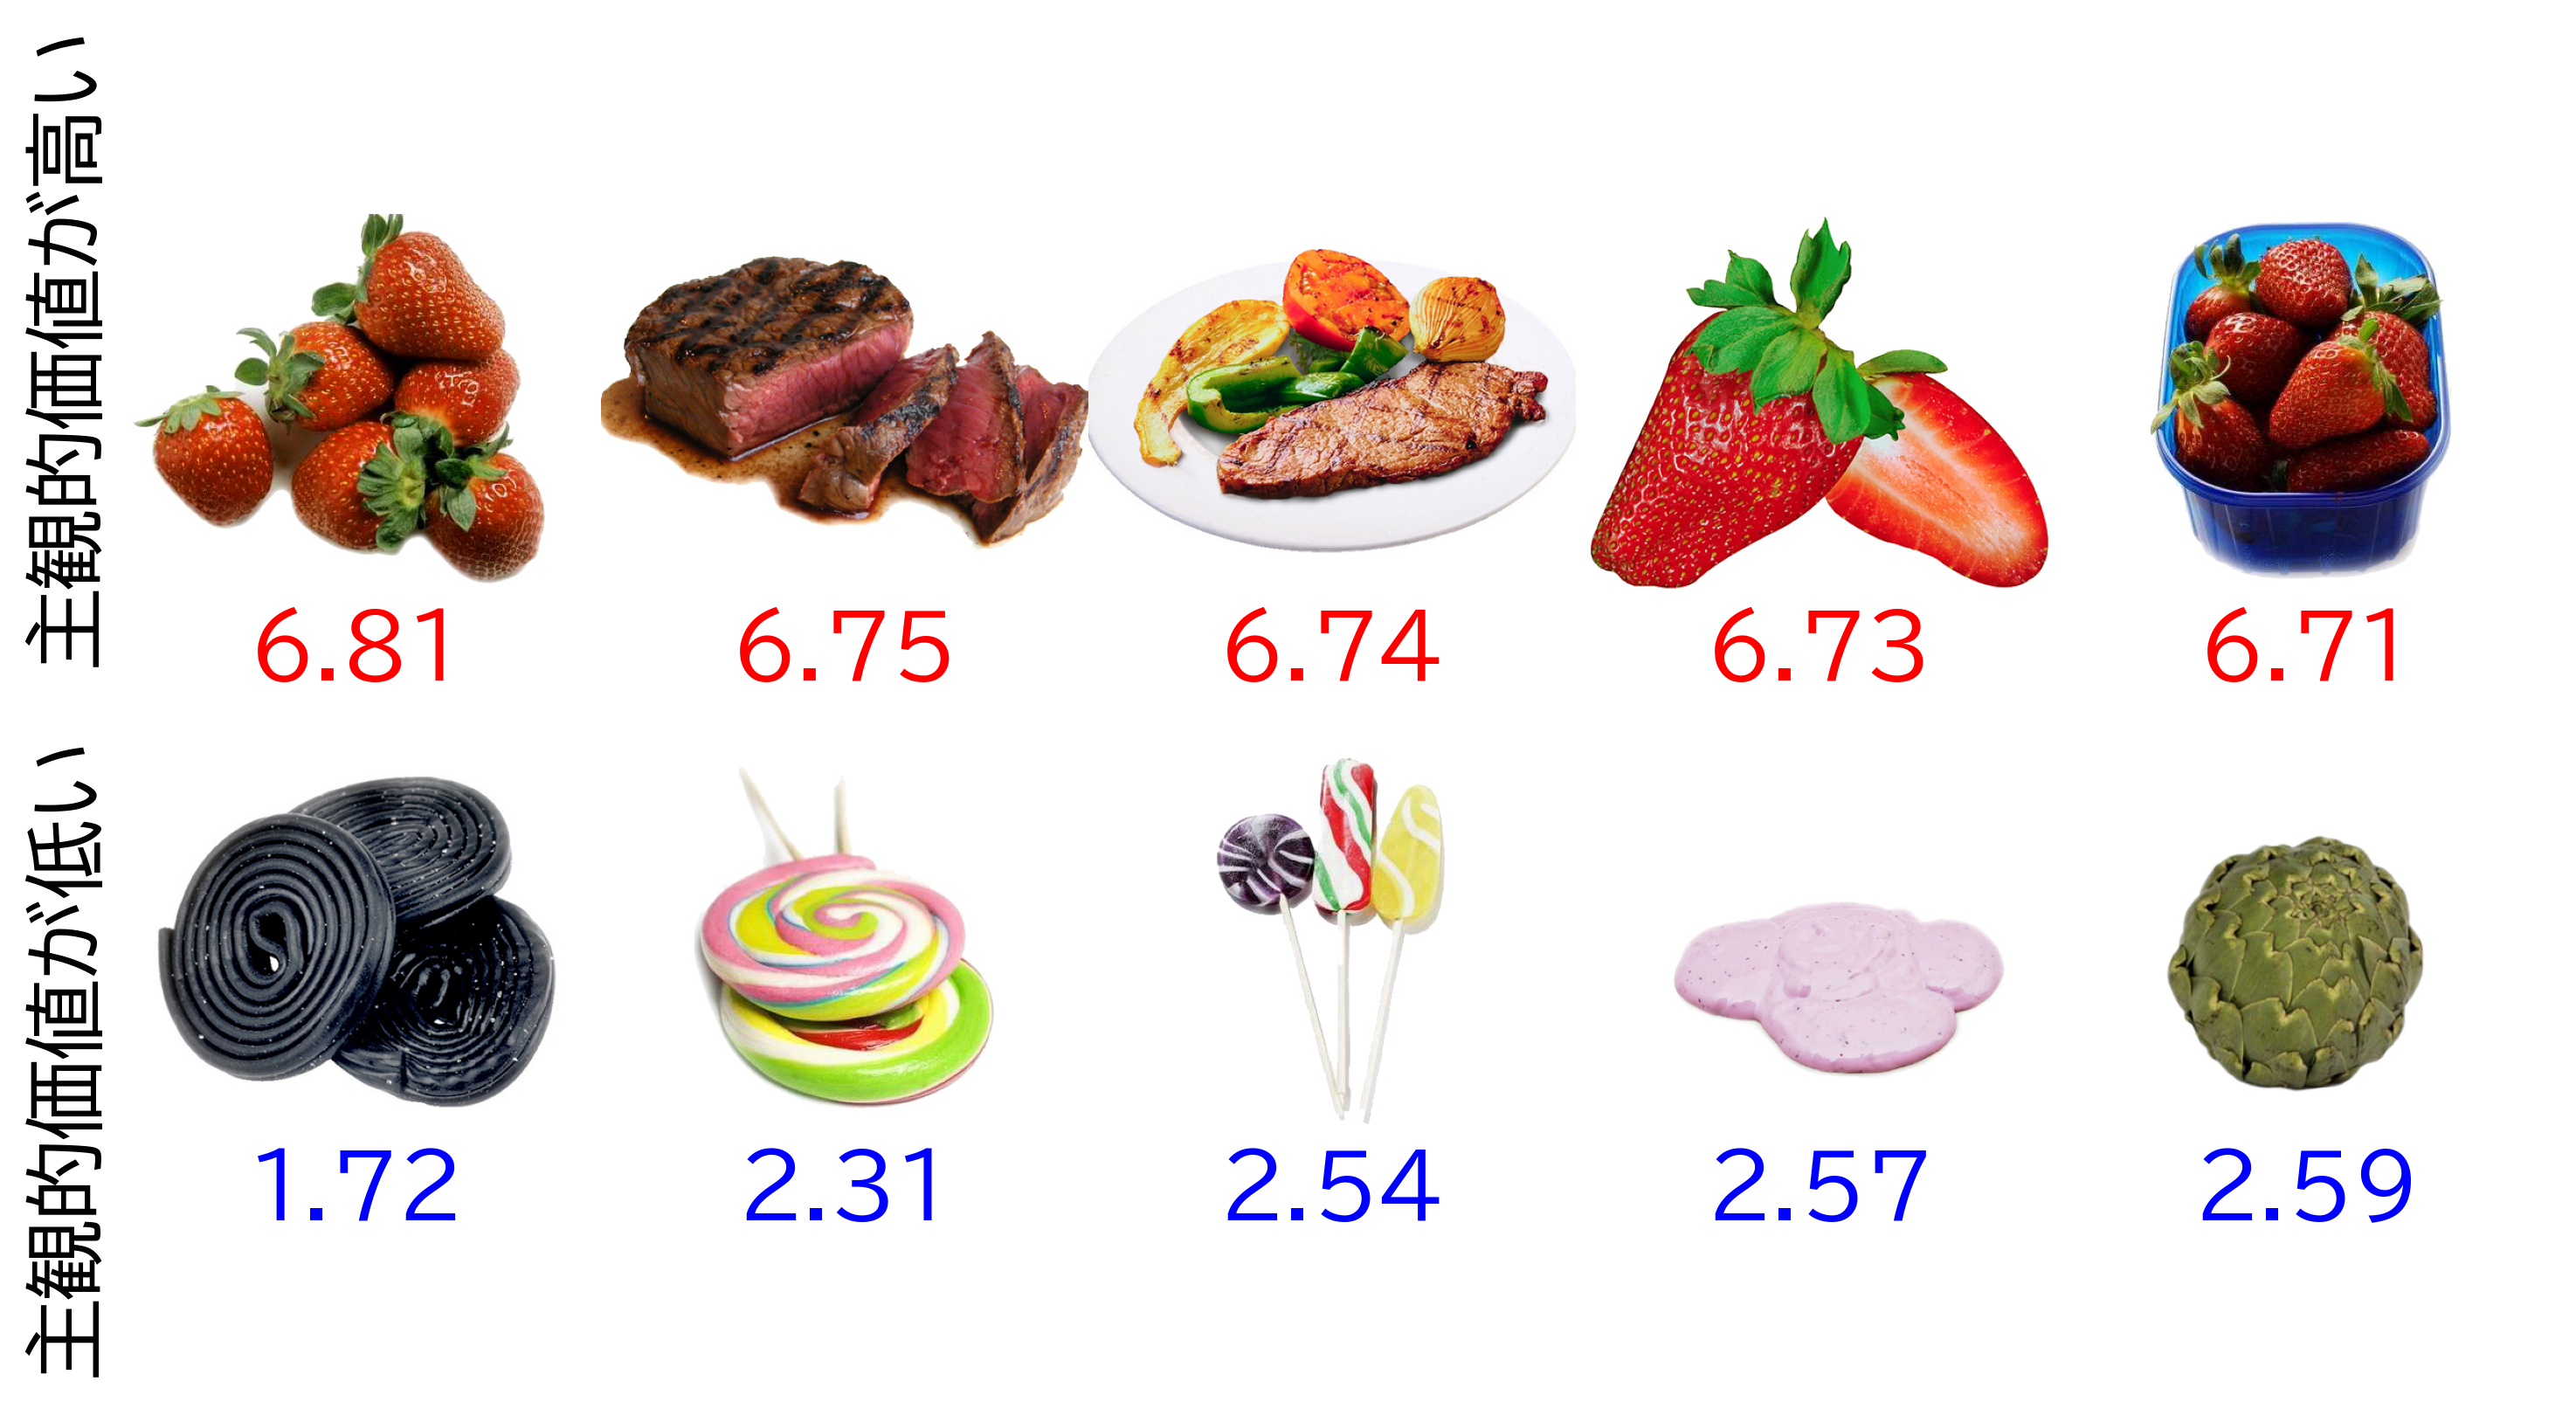

In [5]:
image_dir = os.path.join(DATA_PATH, "Database")
# sns.set_theme(font="BIZ UDPGothic")
plt.rcParams["font.family"] = ["BIZ UDPGothic"]
print(image_dir)
image_files = sorted(
    [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
)
fig, axes = plt.subplots(2, 5, figsize=(12, 5), dpi=300)
good_axes = axes[0]
bad_axes = axes[1]
res_L_sorted = res_mean["res_L"].sort_values(ascending=False)
img_idxs = (
    res_L_sorted[:5].sort_values().index.get_level_values("img").to_list()
    + res_L_sorted[-5:].index.get_level_values("img").to_list()
)
print(img_idxs)
for i in img_idxs:
    if i in res_mean["res_L"].sort_values(ascending=False)[:5].index.get_level_values("img"):
        print("good", i)
        ax, good_axes = good_axes[-1], good_axes[:-1]
        if len(good_axes) == 4:
            ax.text(
                -4.1,
                0.65,
                "主観的価値が高い",
                va="center",
                ha="center",
                rotation=90,
                fontsize=22,
                transform=ax.transAxes,
            )
    else:
        print("bad", i)
        ax , bad_axes = bad_axes[-1], bad_axes[:-1]
        if len(bad_axes) == 4:
            ax.text(
                -4.1,
                0.2,
                "主観的価値が低い",
                va="center",
                ha="center",
                rotation=90,
                fontsize=22,
                transform=ax.transAxes,
            )

    image = Image.open(os.path.join(image_dir, image_files[i - 1])).convert("RGB")
    ax.imshow(np.asarray(image)[35:-35,55:-55, :])
    ax.set_xlabel(
        round(res_mean.loc[i, "res_L"], 2),
        fontsize=24,
        color="blue" if i in res_L_sorted[-5:].index.get_level_values("img") else "red",
    )
    # ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.setp(ax.spines.values(), visible=False)
    ax.set_xticks([])
plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0.15)
plt.show()
fig.savefig(os.path.join(DATA_PATH, "output", "top_bottom_subjective_value.png"), bbox_inches="tight", dpi=300)